In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
import pylab as pl
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

In [54]:
x = iris.data[:,2:]
y = iris.target

In [55]:
C = 1.0
models = [
    svm.SVC(kernel = 'linear', C = C,),
    svm.LinearSVC(C = C, ),
    svm.SVC(kernel = 'poly', degree = 3,gamma="auto", C = C),
    svm.SVC(kernel = 'rbf', gamma = 0.7, C = C),
]

models = [clf.fit(x,y)for clf in models]

In [56]:
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with polynomial (degree 3) kernel",
    "SVC with RBF kernel",
)

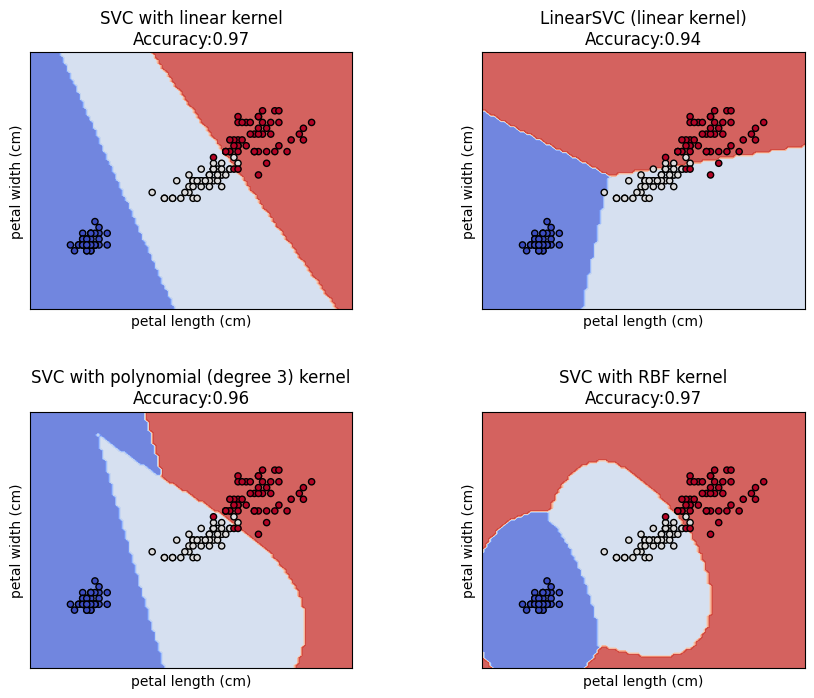

In [57]:
fig,sub = plt.subplots(2,2,figsize=(10,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
x0,x1 = x[:,0], x[:,1]
for clf,title,ax in zip(models, titles, sub.flatten()):
  y_pred = clf.predict(x)
  accuracy = accuracy_score(y, y_pred)
  disp = DecisionBoundaryDisplay.from_estimator(
      clf,
      x,
      response_method = "predict",
      cmap = plt.cm.coolwarm,
      alpha = 0.8,
      ax = ax,
      xlabel = iris.feature_names[2],
      ylabel = iris.feature_names[3],
  )
  ax.scatter(x0,x1,c=y,cmap=plt.cm.coolwarm,s=20,edgecolors="k")
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(f"{title}\nAccuracy:{accuracy:.2f}")

plt.show()

In [58]:
x = iris.data
y = iris.target

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
gnb = GaussianNB()
y_pred = gnb.fit(x_train,y_train).predict(x_test)

In [60]:
acc = accuracy_score(y_test,y_pred)
print("貝氏分類器之準確率為:",acc*100,"%")

貝氏分類器之準確率為: 93.33333333333333 %


In [61]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [62]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)
clf.fit(x,y)

KNeighborsClassifier()

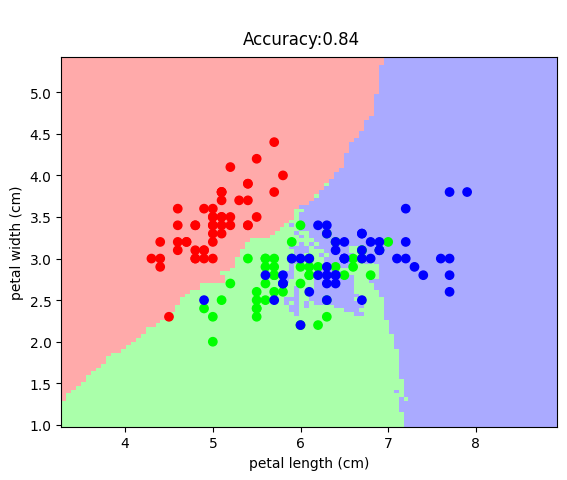

In [63]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
  iris = datasets.load_iris()
  x = iris.data[:,:2]
  y = iris.target

  knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
  knn.fit(x,y)

  x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
  y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

  z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
  accuracy = accuracy_score(y,knn.predict(x))
  z = z.reshape(xx.shape)
  pl.figure()
  pl.pcolormesh(xx,yy,z,cmap=cmap_light)
  pl.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold)
  pl.xlabel('petal length (cm)')
  pl.ylabel('petal width (cm)')
  pl.axis('tight')
  pl.suptitle(f"\nAccuracy:{accuracy:.2f}")
plot_iris_knn()